In [30]:
import geopandas as gpd

EPSG:3435


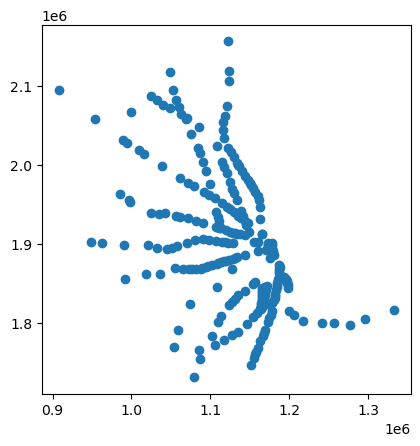

In [47]:
# shapefile = gpd.read_file("../data/MetraStations/MetraStations.shp")

df = gpd.read_file("../data/MetraStations")
df.plot()

print(df.crs)

<AxesSubplot: >

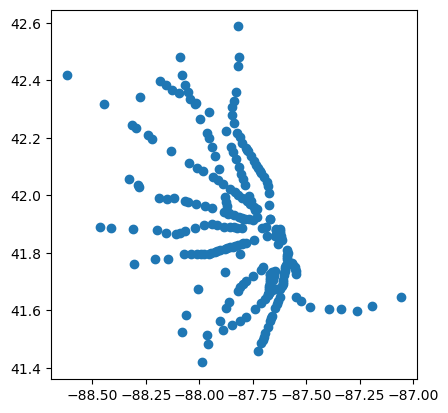

In [48]:
# convert to lat-long
df = df.to_crs(epsg=4326)
df.plot()

In [51]:
import math
import numpy as np
from geopy import distance

def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def find_closest_metra(df, x, y):
    coords = df['geometry'].get_coordinates()

    # find min distance station
    idx = np.argmin(np.sqrt(np.square(coords['x'].values - x) + np.square(coords['y'].values - y)))
    return coords['x'][idx], coords['y'][idx] 

def find_distance_to_closest_metra(df, x, y):
    metra_coords = find_closest_metra(df, x, y)

    return distance.distance((x, y), metra_coords).mi

find_distance_to_closest_metra(df, -88.021, 42.232)

4.069279504681751